Pineapple - Robot Shop Pattern 1 

In [2]:
# Required Imports 
import pandas as pd 
import numpy as np 
import os 
import matplotlib.pyplot as plt
import json
import time
from datetime import datetime, timedelta
from matplotlib.dates import date2num
from scipy.interpolate import make_interp_spline
import seaborn as sns

In [3]:
# https://stackoverflow.com/a/1879011/14626757
# Returns a walked path under collected_data
def f(starting_path): 
  alld = {'': {}}

  for dirpath, dirnames, filenames in os.walk(starting_path):
    d = alld
    dirpath = dirpath[len(starting_path):]
    for subd in dirpath.split(os.sep):
      based = d
      d = d[subd]
    if dirnames:
      for dn in dirnames:
        d[dn] = {}
    else:
      based[subd] = filenames
  return alld['']

In [4]:
# standard code to convert data to a timestamp, metric list 
def convert_enddate_to_seconds(ts):
    """Takes ISO 8601 format(string) and converts into epoch time."""
    dt = datetime.strptime(ts[:-7],'%Y-%m-%dT%H:%M:%S')+\
                timedelta(hours=int(ts[-5:-3]),
                minutes=int(ts[-2:]))*int(ts[-6:-5]+'1')
    seconds = time.mktime(dt.timetuple()) + dt.microsecond/1000000.0
    return seconds


def convert_to_json(filename):
    # Opening JSON file
    f = open(filename)
    
    # returns JSON object as
    # a dictionary
    data = json.load(f)

    # Closing file
    f.close()
    return data

# returns 2 lists for average values, and timestamp
def get_list(timeseries):
    y = [val['average'] for val in timeseries]
    x = [pd.to_datetime(convert_enddate_to_seconds(val['timeStamp']),unit='s') for val in timeseries]
    return x,y

# 
def return_time_metric(filename):
    data = convert_to_json(filename)
    timespan = data['timespan']
    time_interval = data['interval']
    value = data['value'][0]
    name_of_graph = value['name']['value']
    timeseries = value['timeseries'][0]['data']
    x, y = get_list(timeseries)
    return x,y

def create_graph(x,y,):
    # def clean_plot(data, metric):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    
    ax.plot(x, y)   # 2021-12-31T18:36:00+00:00 2021-12-31T19:05:00+00:00


In [5]:
# Generate file listings
filepath = "../collected_data/pineapple"
api      = os.path.join(filepath, "api")
machine  = os.path.join(filepath, "machine")

api_listing     = f(api)
machine_listing = f(machine)

## CPU Usage

/home/krish/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/krish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


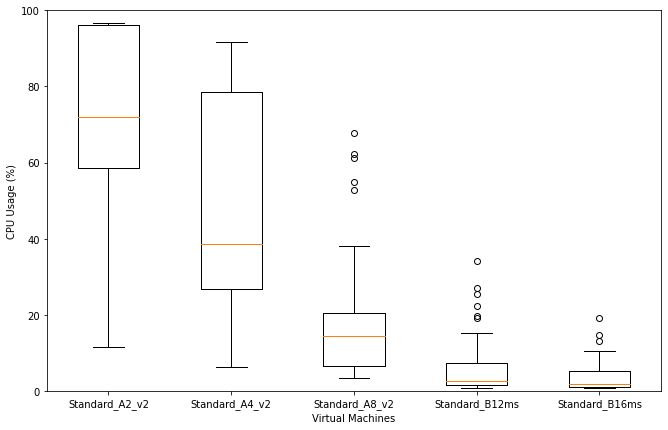

In [6]:
big_machine = {}
for size, iteration in machine_listing.items():
    metrics   = []
    timestamp = 0
    for iteration, files in iteration.items(): 
        temp_path = os.path.join(machine, size, iteration)
        timestamp, metric = return_time_metric(os.path.join(temp_path, "percentageCPU.json"))
        metrics.append(metric)
    tiny_machine = {}

    for i in range(0, len(timestamp)):
        metric_per_time = []
        for n in metrics:
            metric_per_time.append(n[i])
        metric_per_time = [float(x) for x in metric_per_time if x != None]
        tiny_machine[timestamp[i]] = np.mean(metric_per_time) #Change here to maintain value or not.
    big_machine[size] = tiny_machine


# Sort big_machine basedo n list 
machine_names = ["Standard_A2_v2","Standard_A4_v2","Standard_A8_v2","Standard_B12ms","Standard_B16ms"]
ordered_dict = {}
for item in machine_names:
    ordered_dict[item] = big_machine[item]

def do_this(machine_dict):
    ranged = []
    for key, value in machine_dict.items(): 
        ranged.append([x for x in list(value.values()) if str(x) != 'nan'])
  
    fig = plt.figure(figsize =(11, 7))
    ax = fig.add_subplot(111)
    plt.boxplot( ranged) 
    ax.set_xticklabels(list(machine_dict.keys()))
    plt.ylim(0, 100)
    plt.xlabel("Virtual Machines")
    plt.ylabel("CPU Usage (%)")

    plt.show()

do_this(ordered_dict)

## Memory Usage


In [32]:
import math
def convert_size(size_bytes):
    if str(size_bytes) == 'nan':
        print("nan", size_bytes)
        return "nan"
    if size_bytes == 0:
        return 0
    size_name = ("B", "KB", "MB", "GB", "TB", "PB", "EB", "ZB", "YB")
    i = int(math.floor(math.log(size_bytes, 1024)))
    p = math.pow(1024, i)
    s = round(size_bytes / p, 2)
    return s

/home/krish/.local/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/krish/.local/lib/python3.8/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


nan nan


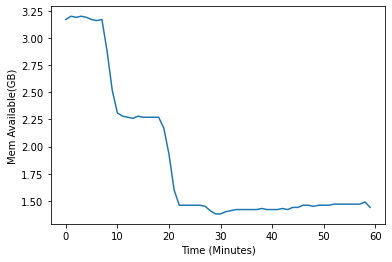

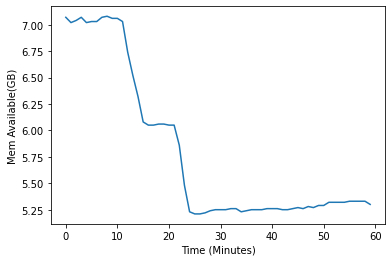

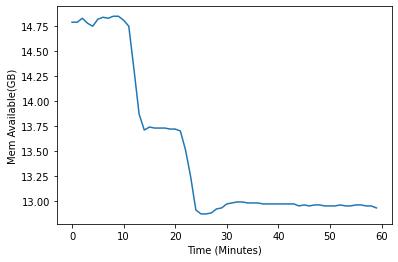

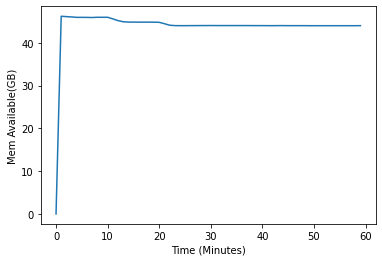

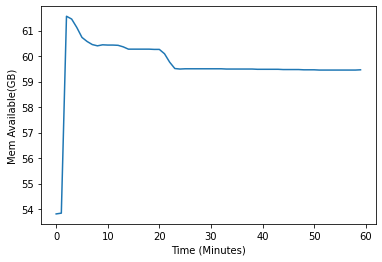

In [48]:
big_machine = {}
for size, iteration in machine_listing.items():
    metrics   = []
    timestamp = 0
    for iteration, files in iteration.items(): 
        temp_path = os.path.join(machine, size, iteration)
        timestamp, metric = return_time_metric(os.path.join(temp_path, "availableMemoryBytes.json"))
        metrics.append(metric)
    tiny_machine = {}

    for i in range(0, len(timestamp)):
        metric_per_time = []
        for n in metrics:
            metric_per_time.append(n[i])
        metric_per_time = [np.float32(x) for x in metric_per_time if x != None]
        tiny_machine[timestamp[i]] = np.mean(metric_per_time) #Change here to maintain value or not.
    big_machine[size] = tiny_machine


# Sort big_machine basedo n list 
machine_names = ["Standard_A2_v2","Standard_A4_v2","Standard_A8_v2","Standard_B12ms","Standard_B16ms"]
ordered_dict = {}
for item in machine_names:
    ordered_dict[item] = big_machine[item]

def do_this(machine_dict):
    memory = []
    time   = []
    for key, value in machine_dict.items(): 
        memory.append([convert_size(x) for x in list(value.values()) if x != "nan"])
        time.append([x for x in list(value.keys())])



    # fig = plt.figure(figsize =(11, 7))
    for i in range(len(time)):
        if len(memory[i]) != len(time[i]):
            memory[i] = memory[i].insert(memory[i][1])
            
        plt.plot(range(0, len(time[i])),  memory[i]) 

    
        plt.xlabel("Time (Minutes)")
        plt.ylabel("Mem Available(GB)")
        plt.show()

do_this(ordered_dict)

     Requests/s      50%      66%      75%      80%       90%       95%  \
3     43.000000     50.0     72.0     88.0     99.0     160.0     160.0   
4     33.500000     53.0     79.0     89.0    100.0     130.0     160.0   
5     34.666667     56.0     79.0     90.0    110.0     160.0     300.0   
6     37.250000     58.0     81.0     98.0    110.0     160.0     300.0   
7     42.000000     59.0     81.0     95.0    110.0     160.0     240.0   
..          ...      ...      ...      ...      ...       ...       ...   
169   51.100000  26000.0  49000.0  62000.0  72000.0  127000.0  213000.0   
176   13.000000  27000.0  51000.0  69000.0  82000.0  144000.0  215000.0   
182   38.500000  35000.0  54000.0  72000.0  86000.0  152000.0  227000.0   
191   52.400000  38000.0  58000.0  76000.0  96000.0  186000.0  246000.0   
192    2.000000  38000.0  58000.0  76000.0  97000.0  191000.0  247000.0   

          98%       99%     99.9%    99.99%      100%  
3      1000.0    1000.0    1000.0    1000.0

/tmp/ipykernel_14194/2838815288.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(list(requests.keys())[1::])


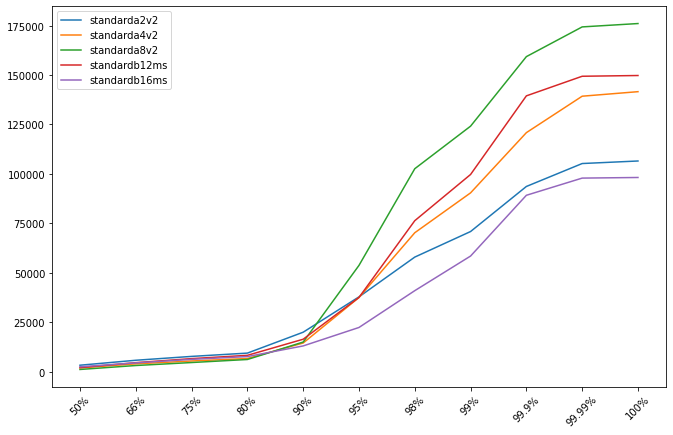

In [ ]:
# Latency Average Percentages
big_api = {}
# Get all values
fig = plt.figure(figsize =(11, 7))
ax = fig.add_subplot(111)
machine_names = ["standarda2v2","standarda4v2","standarda8v2","standardb12ms","standardb16ms"]
ordered_listing = {}
for item in machine_names:
    ordered_listing[item] = api_listing[item]

for size, iteration in ordered_listing.items():
    # df_files = {} 

    df_list = list()
    new_df = pd.DataFrame(columns=["Requests/s", "50%","66%","75%","80%","90%","95%","98%","99%","99.9%","99.99%","100%"])

    for iteration, files in iteration.items(): 
        temp_path = os.path.join(api, size, iteration)
        file_name = "load_stats_history.csv"
        df = pd.read_csv(os.path.join(temp_path, file_name))
        df["datetime"] = df["Timestamp"].apply(lambda t: datetime.fromtimestamp(t))
        requests = df[["Requests/s", "50%","66%","75%","80%","90%","95%","98%","99%","99.9%","99.99%","100%"]]
        # stats_history_df = stats_history_df[stats_history_df.Name != "Aggregated"]
        requests = requests[requests["Requests/s"] != 0.0]
        print(requests)
        new_df = new_df.append(requests, ignore_index=True )

        # print(requests)
        # df_list
    print(size)
    plt.plot(list(new_df.mean().to_dict().keys())[1::], list(new_df.mean().to_dict().values())[1::])

ax.legend(list(ordered_listing.keys()))
ax.set_xticklabels(list(requests.keys())[1::])
plt.xticks(rotation=45)

plt.show()
        # df_files[iteration] = df
#         df_list.append(df)
        
#     big_api[size] =  df_list

# # average metrics
# for key, values in big_api.items():
#     convert_to_df = {}
#     for i in range(0, len(values)):
        
#         timestamp =  values[i]["Timestamp"]
#         plt.plot(timestamp, values[i]["Total Average Response Time"]) 
#         plt.title(key)
#         plt.xticks(rotation=45)
#     plt.show()


